## IMPORTS

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV, KFold
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
sns.set(style="whitegrid")

Fnl-weight represents final weight, which is the number of units in the target population that the responding unit represents.

## DATA CLEANING

#### Load Data set

In [2]:
# laod the dataset 
df = pd.read_csv('adult.csv')

#### Manipulate the columns 

In [3]:
## basic stats on the columns 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [4]:
#check if there is any null values 
df.isna().values.any()

False

In [5]:
#Change the value of the income columns 0s and 1s to make things clear
df['income'] = df['income'].map({'<=50K':0, '>50K':1})
df.income.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [6]:
# looking through the dataset there are ? values so I replaced it with np.nan and the later dropped it.
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [7]:
# replace the ? with np.nan 
df = df.replace('?', np.NaN)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [8]:
# Drop the np.nan 
df = df.dropna()
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0


In [9]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
df['marital.status'] = df['marital.status'].replace(['Widowed', 'Divorced', 'Separated', 'Never-married'], 'single')

df['marital.status'] = df['marital.status'].replace(['Married-spouse-absent', 'Married-civ-spouse', 'Married-AF-spouse'], 'married')

In [11]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,single,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,single,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,single,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,single,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,single,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,single,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,married,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,single,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


## EDA

In [12]:
df['race'].value_counts()


White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: race, dtype: int64

In [13]:
df['income'].value_counts(normalize= True)

0    0.751078
1    0.248922
Name: income, dtype: float64

#### Visulizations

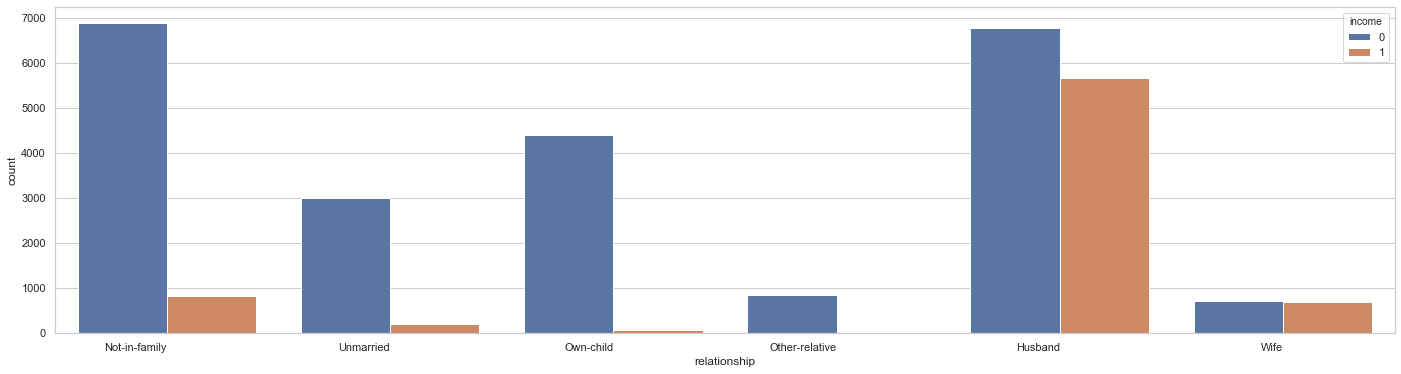

In [14]:
plt.figure(figsize=(24, 6))
ro = sns.countplot(df['relationship'], hue=df['income'])
ro.set_xticklabels(ro.get_xticklabels(), rotation=0, ha="right")
plt.show()

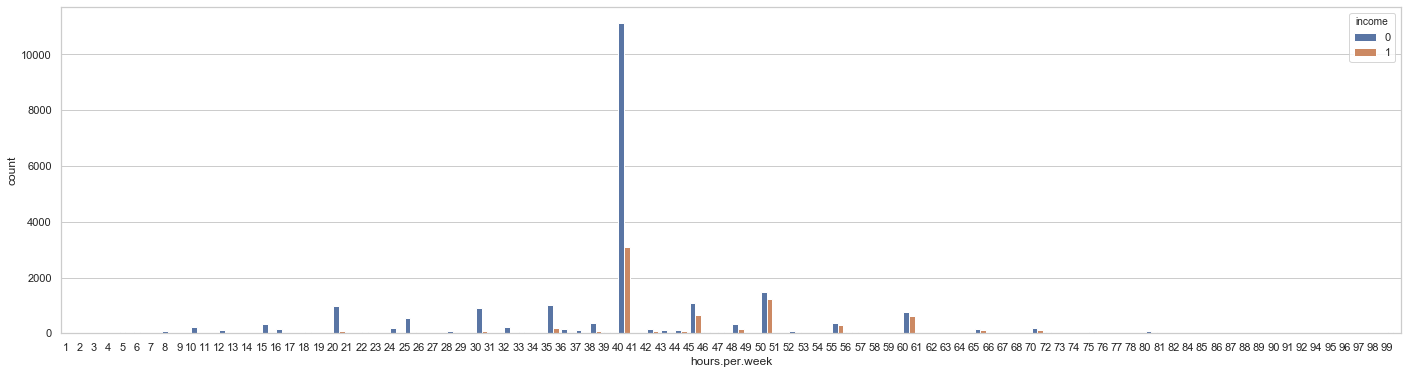

In [15]:
plt.figure(figsize=(24, 6))
ro = sns.countplot(df['hours.per.week'], hue=df['income'])
ro.set_xticklabels(ro.get_xticklabels(), rotation=0, ha="right")
plt.show()

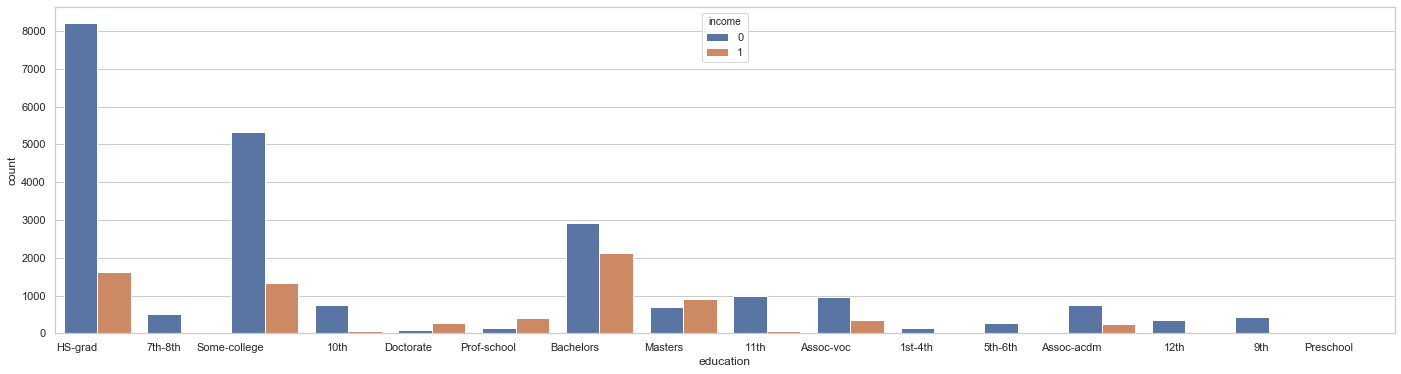

In [16]:
plt.figure(figsize=(24, 6))
ro = sns.countplot(df['education'], hue=df['income'])
ro.set_xticklabels(ro.get_xticklabels(), rotation=0, ha="right")
plt.show()

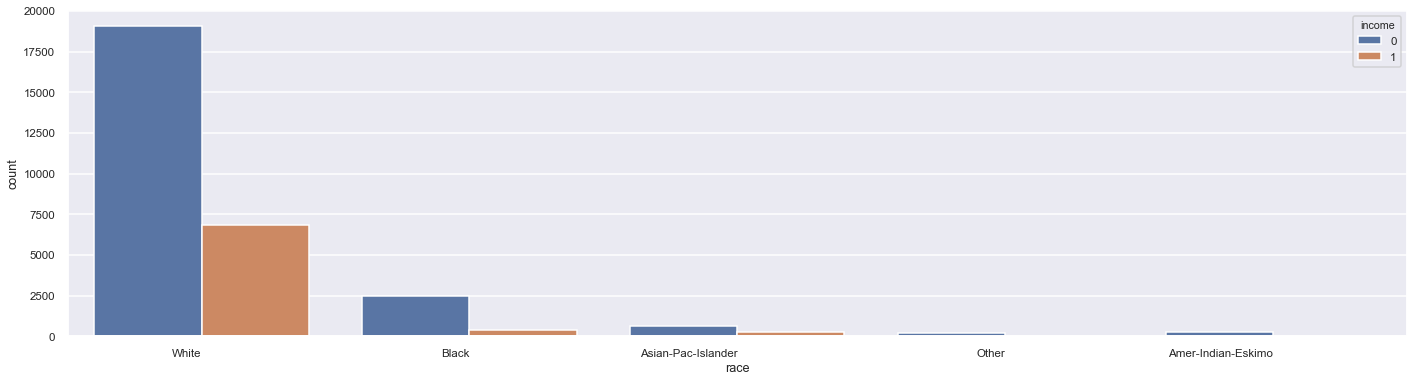

In [73]:
plt.figure(figsize=(24, 6))
ro = sns.countplot(df['race'], hue=df['income'])
ro.set_xticklabels(ro.get_xticklabels(), rotation=0, ha="right")
plt.show()

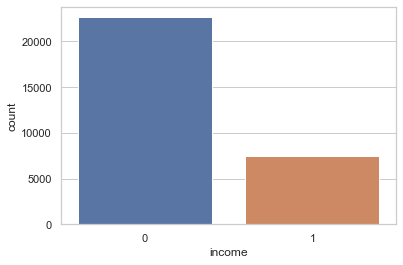

In [17]:
sns.countplot(df['income'])



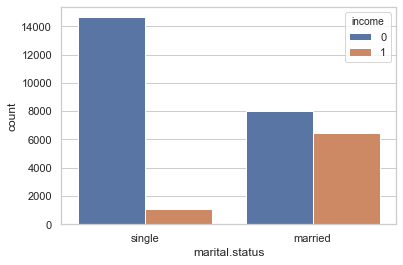

In [18]:
sns.countplot(df['marital.status'], hue=df['income'])

In [19]:
df.groupby('occupation').mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
occupation,,,,,,,
Adm-clerical,37.004569,191949.896264,10.108035,497.097286,59.987638,37.561408,0.133835
Armed-Forces,30.222222,215425.888889,10.111111,0.000000,209.666667,40.666667,0.111111
Craft-repair,38.976675,192298.204963,9.117866,657.586849,86.510918,42.298015,0.225310
Exec-managerial,42.183116,184496.540331,11.438878,2185.330912,139.224198,44.966934,0.485220
Farming-fishing,41.251769,170381.319515,8.614762,592.707786,63.394338,46.990900,0.116279
Handlers-cleaners,32.114815,203602.637778,8.495556,258.140000,44.220000,37.874815,0.061481
Machine-op-inspct,37.693795,195200.527976,8.475585,323.825025,58.526450,40.707019,0.124619
Other-service,34.905978,188434.666252,8.778643,181.705479,36.874222,34.605542,0.041096
Priv-house-serv,42.034965,200711.699301,7.223776,291.594406,22.349650,32.797203,0.006993


In [74]:
df.groupby('race').mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
race,,,,,,,
Amer-Indian-Eskimo,36.737762,123491.944056,9.356643,660.290210,37.164336,40.426573,0.118881
Asian-Pac-Islander,37.910615,159337.400000,11.025698,1304.375419,91.683799,40.500559,0.277095
Black,37.860845,228807.455449,9.530706,604.722045,56.267661,38.674476,0.129925
Other,33.601732,195772.238095,8.683983,1060.653680,50.294372,40.112554,0.090909
White,38.580612,187285.002159,10.175491,1142.651024,92.649558,41.204103,0.263718


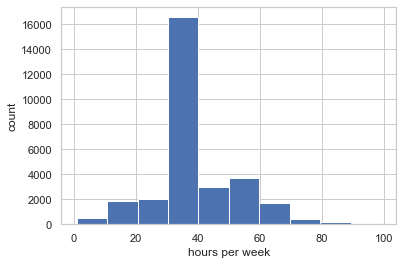

In [20]:
df['hours.per.week'].hist()
plt.xlabel('hours per week')
plt.ylabel('count')
plt.show()

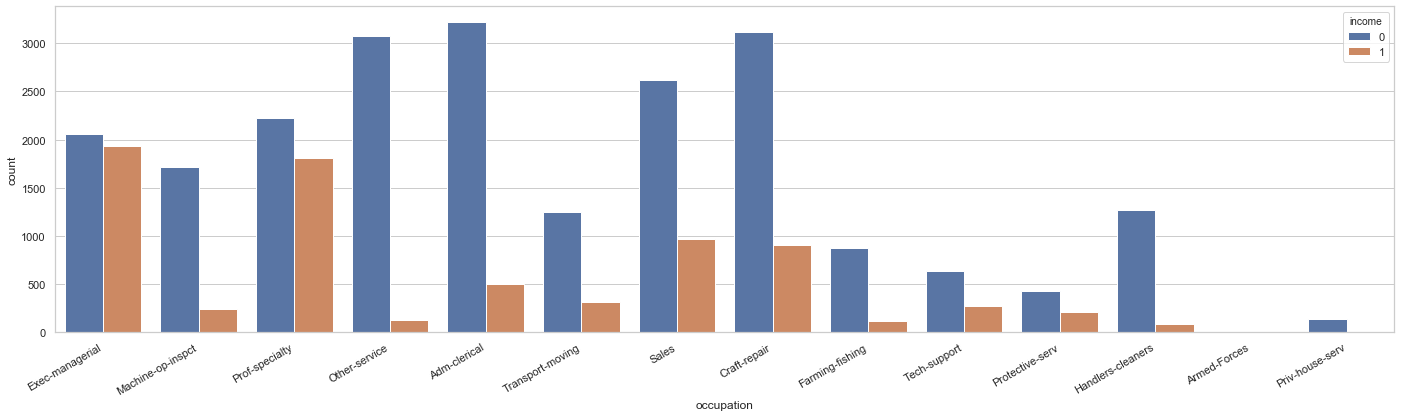

In [21]:
plt.figure(figsize=(24, 6))
ro = sns.countplot(df['occupation'], hue=df['income'])
ro.set_xticklabels(ro.get_xticklabels(), rotation=30, ha="right")
plt.show()

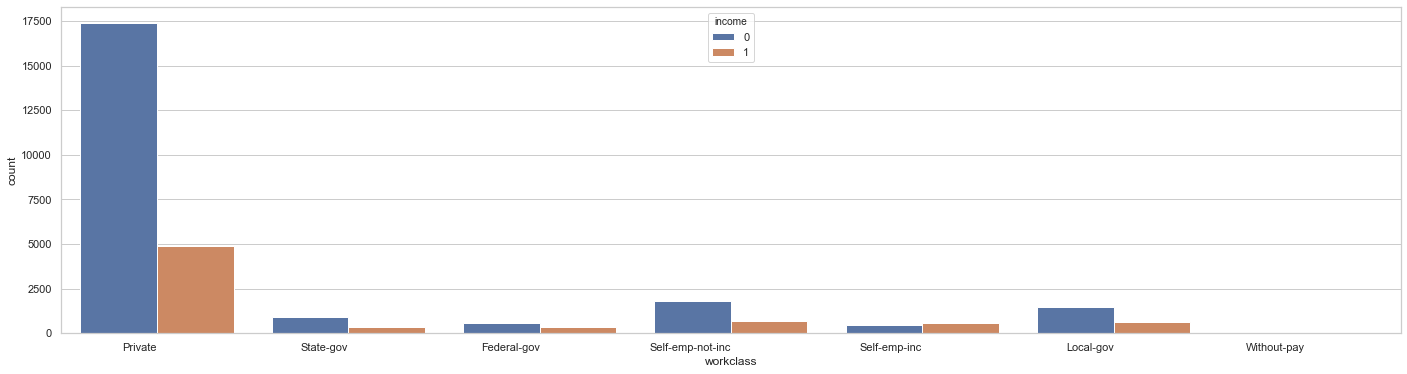

In [22]:
plt.figure(figsize=(24, 6))
ro = sns.countplot(df['workclass'], hue=df['income'])
ro.set_xticklabels(ro.get_xticklabels(), rotation=0, ha="right")
plt.show()

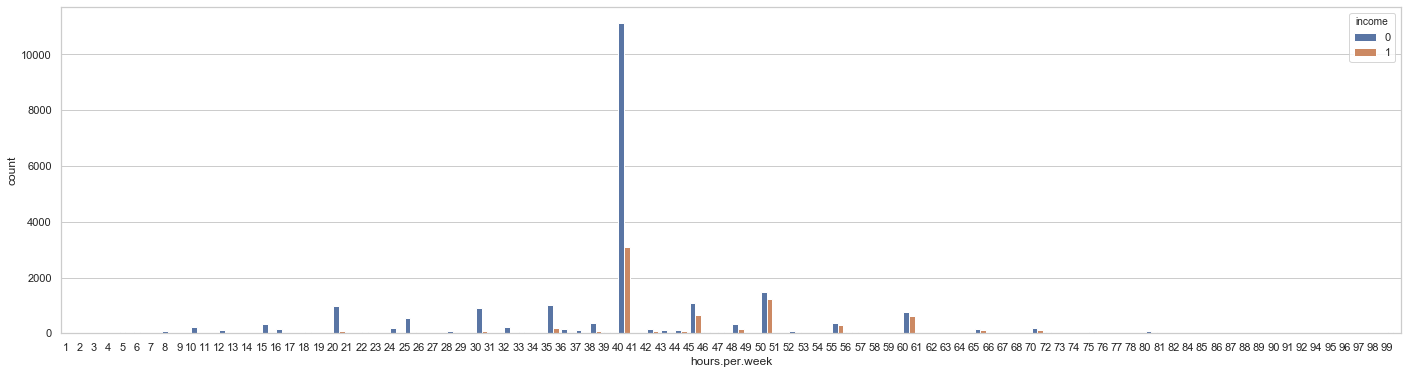

In [23]:
plt.figure(figsize=(24, 6))
ro = sns.countplot(df['hours.per.week'], hue=df['income'])
ro.set_xticklabels(ro.get_xticklabels(), rotation=0, ha="right")
plt.show()

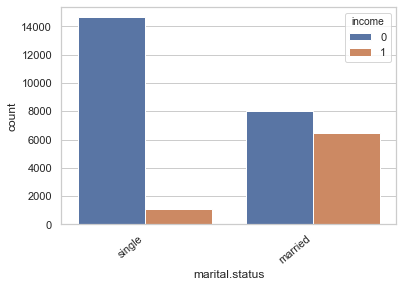

In [24]:
ax = sns.countplot(df['marital.status'], hue=df['income'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

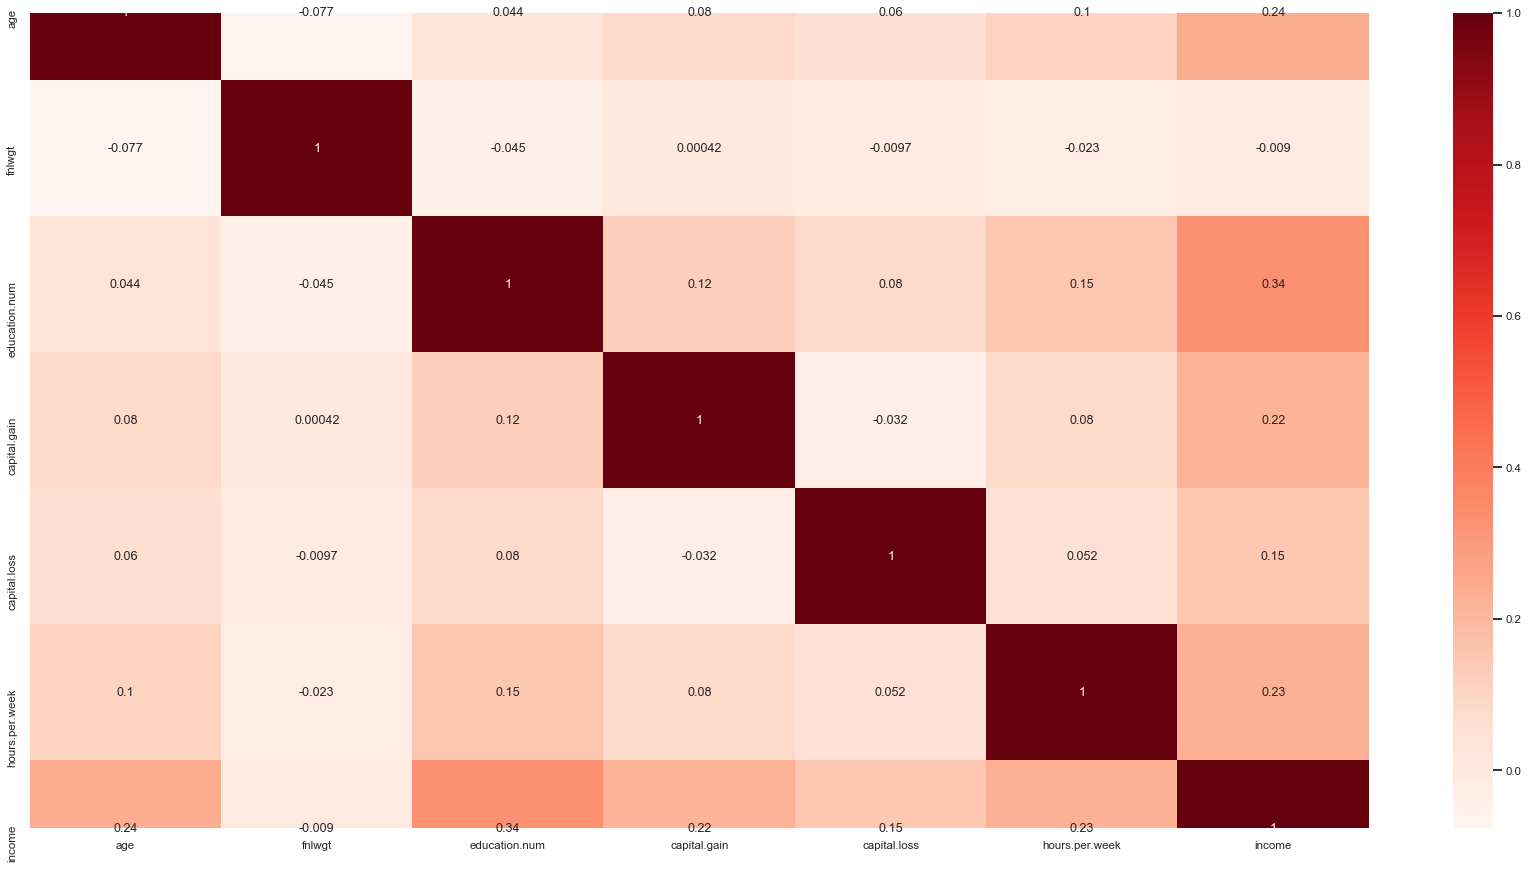

In [25]:
sns.set(rc={'figure.figsize':(30,15)})
sns.set_context("talk", font_scale=0.7)
    
sns.heatmap(df.corr(), cmap='Reds', annot=True);

## Feature Engineering 

#### Get dummies

In [26]:
dummies_race= pd.get_dummies(df['race'],prefix='race',drop_first=True)

In [27]:
dummies_education= pd.get_dummies(df['education'],drop_first=True)

In [28]:
dummies_education


,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
32557,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
32558,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32559,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [29]:
df1= df.drop(['race','education','fnlwgt'], axis=1)

In [30]:
df1

,age,workclass,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,9,single,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,0
3,54,Private,4,single,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,0
4,41,Private,10,single,Prof-specialty,Own-child,Female,0,3900,40,United-States,0
5,34,Private,9,single,Other-service,Unmarried,Female,0,3770,45,United-States,0
6,38,Private,6,single,Adm-clerical,Unmarried,Male,0,3770,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,single,Protective-serv,Not-in-family,Male,0,0,40,United-States,0
32557,27,Private,12,married,Tech-support,Wife,Female,0,0,38,United-States,0
32558,40,Private,9,married,Machine-op-inspct,Husband,Male,0,0,40,United-States,1
32559,58,Private,9,single,Adm-clerical,Unmarried,Female,0,0,40,United-States,0


In [31]:
df2 = pd.concat([df1, dummies_education, dummies_race], axis=1)
df2.head()

,age,workclass,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,...,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,race_Asian-Pac-Islander,race_Black,race_Other,race_White
1,82,Private,9,single,Exec-managerial,Not-in-family,Female,0,4356,18,...,0,1,0,0,0,0,0,0,0,1
3,54,Private,4,single,Machine-op-inspct,Unmarried,Female,0,3900,40,...,0,0,0,0,0,0,0,0,0,1
4,41,Private,10,single,Prof-specialty,Own-child,Female,0,3900,40,...,0,0,0,0,0,1,0,0,0,1
5,34,Private,9,single,Other-service,Unmarried,Female,0,3770,45,...,0,1,0,0,0,0,0,0,0,1
6,38,Private,6,single,Adm-clerical,Unmarried,Male,0,3770,40,...,0,0,0,0,0,0,0,0,0,1


## Models

#### KNN

In [32]:
X=df2.drop(['income',],axis=1)
y=df2['income']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [34]:
from sklearn import preprocessing
import sys
categorical = ['workclass', 'marital.status', 'occupation', 'relationship', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [35]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [36]:
k_scores=[]
#set up a loop to fit the model using a different values of K
k_range = list(range(1, 15))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    #fit the model and get the score on a evaluation metric
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
#     acc = metrics.accuracy_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    k_scores.append(f1_score)
    # Print out the scores to see which one is best.
print("for neightbours = ",k,"Score =",k_scores)

for neightbours =  14 Score = [0.5956659619450317, 0.5168389463154385, 0.6192445547284258, 0.5717916137229987, 0.6218961625282167, 0.5904998447687054, 0.6344238975817923, 0.604594180704441, 0.6389994314951677, 0.6118143459915611, 0.6370875995449374, 0.6147393648891551, 0.6366742596810934, 0.6158445440956651]


In [75]:
accuracy = metrics.accuracy_score(y_test,y_pred)

In [76]:
accuracy

0.8295981965256597

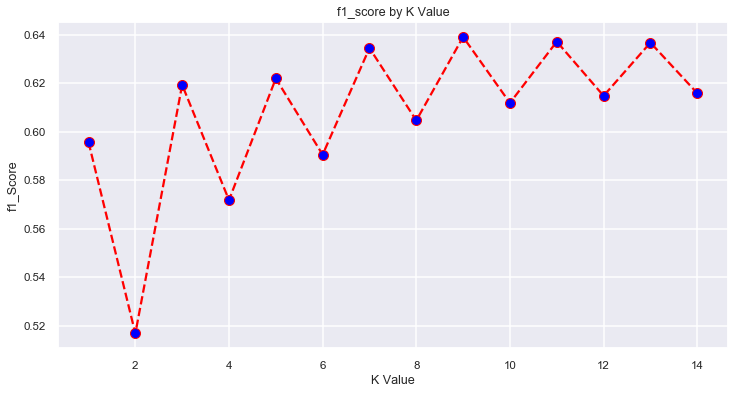

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('f1_score by K Value')
plt.xlabel('K Value')
plt.ylabel('f1_Score')
plt.show()

#### Logistic regression

In [38]:
X_train

array([[ 0.7274979 , -0.20318061,  0.74052923, ..., -0.31914096,
        -0.08855162,  0.40281086],
       [-0.03399995, -0.20318061, -0.43540055, ..., -0.31914096,
        -0.08855162,  0.40281086],
       [ 1.03209703, -0.20318061, -0.04342396, ..., -0.31914096,
        -0.08855162,  0.40281086],
       ...,
       [-0.33859909,  1.90417777, -0.43540055, ..., -0.31914096,
        -0.08855162,  0.40281086],
       [ 1.03209703, -0.20318061, -0.43540055, ..., -0.31914096,
        -0.08855162,  0.40281086],
       [ 0.42289876, -1.2568598 ,  1.13250582, ..., -0.31914096,
        -0.08855162,  0.40281086]])

In [39]:
x=df2.drop(['income',],axis=1)
y=df2['income']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [41]:
training  = pd.concat([X_train, y_train], axis=1)

In [42]:
under_50 = training[training.income==0]
over_50 = training[training.income==1]

In [43]:
# Get a class count to understand the class imbalance.
print('under_50 count: '+ str(len(under_50)))
print('over_50 count: '+ str(len(over_50)))

under_50 count: 17014
over_50 count: 5607


In [44]:
income_upsampled = resample(over_50,
                          replace=True, # sample with replacement
                          n_samples=len(under_50), # match number in majority class
                          random_state=23) # reproducible results

In [45]:
upsampled = pd.concat([under_50, income_upsampled])

In [46]:
# check new class counts
upsampled.income.value_counts()

1    17014
0    17014
Name: income, dtype: int64

In [47]:
y_train = upsampled.income
X_train = upsampled.drop('income', axis=1)


In [48]:
from sklearn import preprocessing
import sys
categorical = ['workclass', 'marital.status', 'occupation', 'relationship', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [49]:
upsampled_lr = LogisticRegression(solver='liblinear')
# upsampled_dt.fit(X_train, y_train)
upsampled_lr.fit(X_train, y_train)


# upsampled_pred = upsampled_dt.predict(X_test)
upsampled_pred = upsampled_lr.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, upsampled_pred))


# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, upsampled_pred))


Test Accuracy score:  0.777615700835433
Test F1 score:  0.6564228641671789


#### Decision tree

In [50]:
X=df2.drop(['income'],axis=1)
y=df2['income']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [52]:
parameters={'criterion': ['gini','entropy'],
            'min_samples_leaf' : range(5,100,15),
            'max_depth': range(2,20,1)}

In [53]:
from sklearn import preprocessing
import sys
categorical = ['workclass', 'marital.status', 'occupation', 'relationship', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [54]:
clf_tree=DecisionTreeClassifier(random_state=1)
#create the instance of GridSearchCV
grid_tree=GridSearchCV(clf_tree, parameters, cv=5, scoring='f1')
#fit the Gridsearch to our data
grid_tree.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'mi

In [55]:
# examine the best model
# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)
# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)
# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

0.6702147856687501
{'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 20}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')


In [56]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion= 'gini',max_depth= 12, min_samples_leaf=35)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#predict the training set
y_pred_train = clf.predict(X_train)
#Predict the response for test dataset
y_pred_test = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))
print("Training accuracy Score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing accuracy Score:",metrics.accuracy_score(y_test, y_pred_test))

Training F1 Score: 0.6830769230769231
Testing F1 Score: 0.6744457409568261
Training accuracy Score: 0.85884797312232
Testing accuracy Score: 0.8520090173717013


#### Random Forest 

In [57]:
X=df2.drop(['income'],axis=1)
y=df2['income']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [59]:
from sklearn import preprocessing
import sys
categorical = ['workclass', 'marital.status', 'occupation', 'relationship', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [61]:
forest = RandomForestClassifier(criterion='gini',n_estimators=200, max_depth= 10, min_samples_leaf= 5, random_state= 23)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=23, verbose=0,
                       warm_start=False)

In [62]:
# Test accuracy score
forest.score(X_train, y_train)

0.855930330224128

In [63]:
# Test f1 score
forest.score(X_test, y_test)

y_test_predict= forest.predict(X_test)

metrics.f1_score(y_test,y_test_predict)

0.6475047378395452

parameters={'criterion': ['gini','entropy'],
            'min_samples_leaf' : range(5,200,15),
            'max_depth': range(2,21,2)}

grid_tree=GridSearchCV(forest, parameters, cv=5, scoring='f1')
#fit the Gridsearch to our data
grid_tree.fit(X_train,y_train)

In [ ]:
# examine the best model
# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)
# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)
# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

#### XGBOOST

In [64]:
X=df2.drop(['income'],axis=1)
y=df2['income']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [66]:
from sklearn import preprocessing
import sys
categorical = ['workclass', 'marital.status', 'occupation', 'relationship', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [67]:
xg_clf = xgb.XGBClassifier(objective ='binary:logistic',
#                            colsample_bytree = 0.3,
#                            subsample = 0.5,
                           learning_rate = 0.5,
                           max_depth = 15,
                           alpha = 0.8,
#                            scale_pos_weight= df2['default_pmt'].mean(),
                           n_estimators = 300)

In [68]:
xg_clf.fit(X_train,y_train)   

XGBClassifier(alpha=0.8, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [69]:

preds = xg_clf.predict(X_test)
test_f1 = metrics.f1_score(y_test, preds)
test_acc = metrics.accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.840339
F1: 0.671218


param_dist = {'n_estimators': [300,500,700],
              'learning_rate': [0.5,0.8,1],
              'max_depth': [8,10,15],
              'alpha': [0.8,1]}

gsearch1 = GridSearchCV(
    estimator = xg_clf,
    param_grid = param_dist, 
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    iid=False, 
    cv=5)

gsearch1.fit(X_train,y_train)

gsearch1.cv_results_

gsearch1.best_params_

preds = gsearch1.best_estimator_.predict(X_test)


test_f1 = metrics.f1_score(y_test, preds)
test_acc = metrics.accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

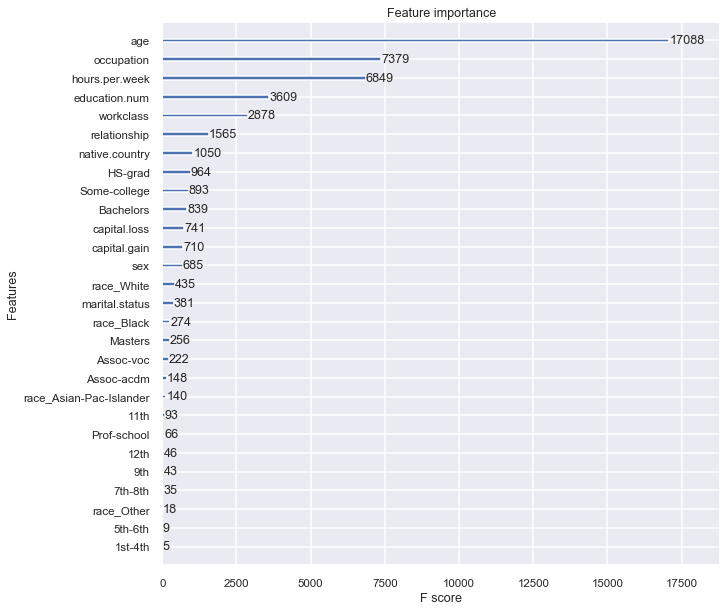

In [72]:
xgb.plot_importance(xg_clf)
plt.rcParams['figure.figsize'] = [10,5]
plt.show()

## Final Model 